<a href="https://colab.research.google.com/github/karim306/Flowers-Classfier/blob/main/FlowerClassfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install dependeiceies and Setup**

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "kareemahm3d" # username from the json file
os.environ['KAGGLE_KEY'] = "505cd3f923d9c7e981e2a419cb8f88b4" # key from the json fil

In [2]:
import tensorflow as tf


# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# **Download The Datset**


In [4]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset
License(s): other
 96% 232M/242M [00:02<00:00, 90.1MB/s]
100% 242M/242M [00:02<00:00, 98.0MB/s]


# **Unzip The Dataset**


In [5]:
# Unzip the dataset into the same directory
!unzip -q 5-flower-types-classification-dataset.zip -d ./5-flower-dataset


# **2. Remove dodgy images:**

In [6]:
import cv2
import imghdr

In [7]:
data_dir = '/content/flower_images'

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# **Load Data**

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/content/flower_images')

Found 4999 files belonging to 5 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
len(batch)

2

In [15]:
batch[1]


array([2, 1, 1, 1, 4, 2, 4, 2, 2, 2, 2, 0, 0, 0, 3, 4, 0, 2, 0, 3, 1, 3,
       0, 1, 2, 0, 1, 3, 4, 1, 2, 1], dtype=int32)

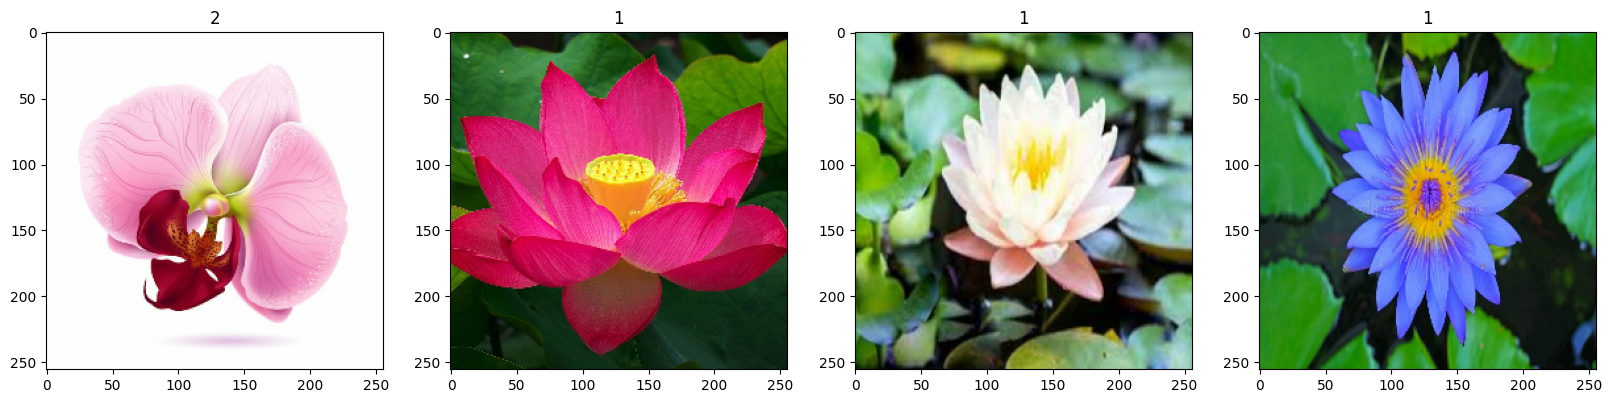

In [16]:
# know each number represent any of our 5 classes

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Scaling The Data**

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[4.23529416e-01, 3.01960796e-01, 1.80392161e-01],
          [4.23529416e-01, 3.01960796e-01, 1.80392161e-01],
          [4.22445267e-01, 3.00876647e-01, 1.79308027e-01],
          ...,
          [2.39215687e-01, 3.01960796e-01, 4.43137258e-01],
          [2.40830824e-01, 3.03575933e-01, 4.44752425e-01],
          [2.42991731e-01, 3.05736840e-01, 4.46913302e-01]],
 
         [[4.23965991e-01, 3.02397370e-01, 1.80828735e-01],
          [4.23965991e-01, 3.02397370e-01, 1.80828735e-01],
          [4.23840642e-01, 3.02271992e-01, 1.80703387e-01],
          ...,
          [2.39090338e-01, 3.01835418e-01, 4.43011880e-01],
          [2.39215687e-01, 3.01960796e-01, 4.43137258e-01],
          [2.39215687e-01, 3.01960796e-01, 4.43137258e-01]],
 
         [[4.27450985e-01, 3.05882365e-01, 1.84313729e-01],
          [4.27450985e-01, 3.05882365e-01, 1.84313729e-01],
          [4.26325053e-01, 3.04756433e-01, 1.83187813e-01],
          ...,
          [2.37571046e-01, 3.00316125e-01, 4.4149

In [19]:
batch_iterator = data.as_numpy_iterator().next()

In [20]:
batch_iterator[0].max()

1.0

# **Split The Data**

In [21]:
len(data )

157

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
val_size

31

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()
# print(batch[1])

[0 1 2 2 1 0 2 1 4 1 4 3 1 2 1 0 3 1 0 2 3 1 3 0 0 3 4 4 2 4 3 1]


# **Building The Model**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))  # Increased number of filters and more layers
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))  # Another convolutional layer
model.add(MaxPooling2D())

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation='relu'))  # Increased dense layer size
model.add(Dense(256, activation='relu'))  # Another dense layer
num_classes = 5  # Replace with the actual number of classes in your dataset
# Output layer for multi-class classification
model.add(Dense(num_classes, activation='softmax'))  # 'num_classes' should be the number of classes in your dataset


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,075,621 (49.88 MB)

 Trainable params: 13,075,621 (49.88 MB)

 Non-trainable params: 0 (0.00 B)

# **Training The Model**

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer from tensorflow.keras.optimizers

# Change this if labels are integer-encoded
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])



In [36]:

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.3475 - loss: 1.4683 - val_accuracy: 0.5625 - val_loss: 1.0761
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.5609 - loss: 1.0828 - val_accuracy: 0.6210 - val_loss: 1.0195
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.6365 - loss: 0.9610 - val_accuracy: 0.6472 - val_loss: 0.8946
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.7018 - loss: 0.7584 - val_accuracy: 0.6744 - val_loss: 0.8368
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.7953 - loss: 0.5401 - val_accuracy: 0.7641 - val_loss: 0.7455
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - accuracy: 0.8957 - loss: 0.2952 - val_accuracy: 0.7853 - val_loss: 0.7580
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.9344 - loss: 0.1935 - val_accuracy: 0.8377 - val_loss: 0.6590
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.9683 - loss: 0

# **Plot Performance**

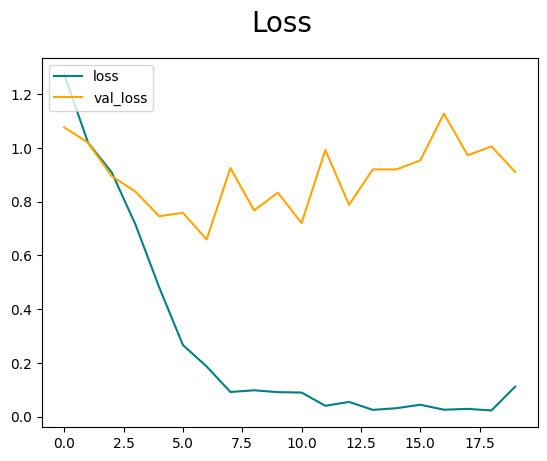

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

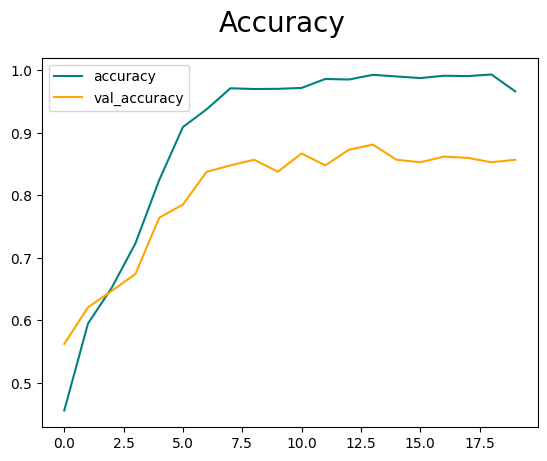

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

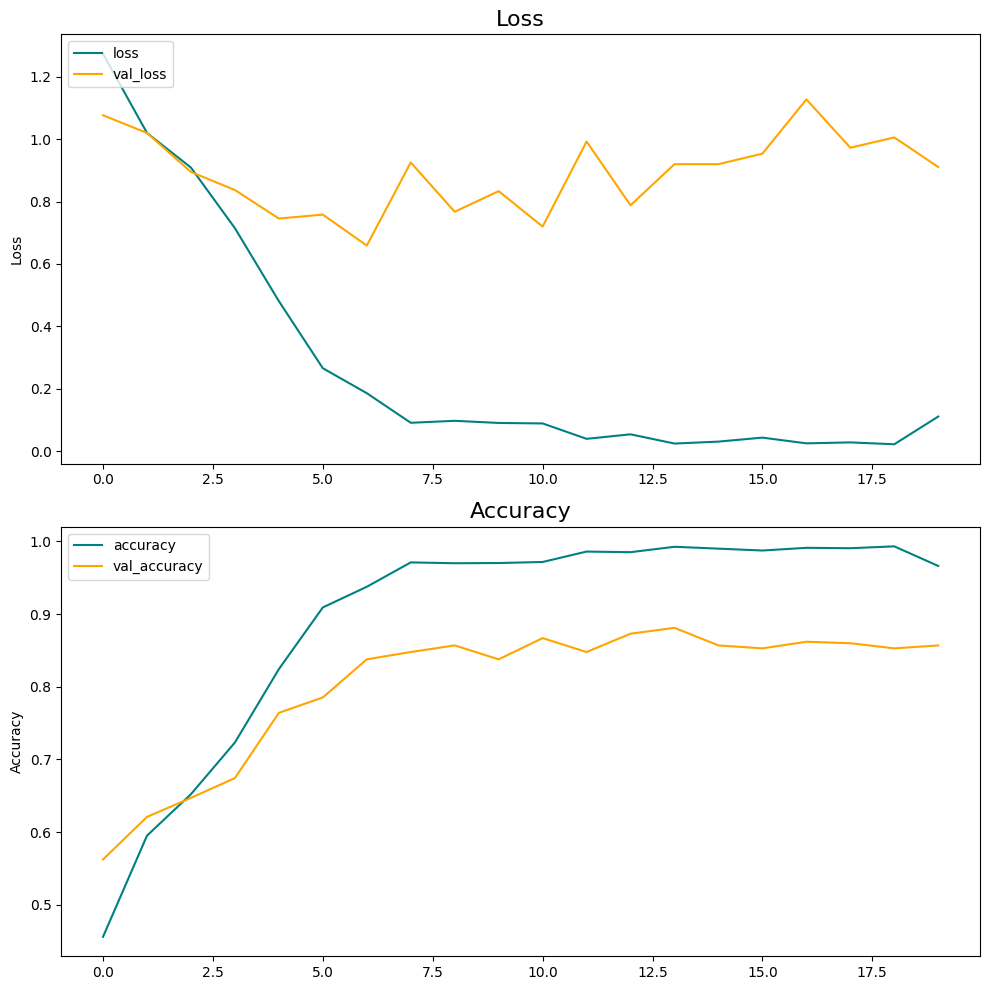

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))  # Create two subplots, stacked vertically

# Plotting loss
ax1.plot(hist.history['loss'], color='teal', label='loss')
ax1.plot(hist.history['val_loss'], color='orange', label='val_loss')
ax1.set_title('Loss', fontsize=16)
ax1.set_ylabel('Loss')
ax1.legend(loc="upper left")

# Plotting accuracy
ax2.plot(hist.history['accuracy'], color='teal', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
ax2.set_title('Accuracy', fontsize=16)
ax2.set_ylabel('Accuracy')
ax2.legend(loc="upper left")

plt.tight_layout()  # Adjust spacing between plots
plt.show()


# **Evauation**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
import tensorflow as tf

# Define metrics
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

# Convert the integer-encoded labels to one-hot encoding
for batch in test.as_numpy_iterator():
    X, y = batch
    y_one_hot = tf.one_hot(y, depth=5)  # Assuming 5 classes in your case
    yhat = model.predict(X)

    pre.update_state(y_one_hot, yhat)
    re.update_state(y_one_hot, yhat)
    acc.update_state(y_one_hot, yhat)

# Print the results
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
0.8117155 0.80833334 0.80833334


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Accuracy: 0.8125
Confusion Matrix:
[[66  7  8  2  6]
 [ 5 80  4  2  2]
 [14 10 71  4  6]
 [ 1  0  1 94  0]
 [ 9  3  1  5 79]]


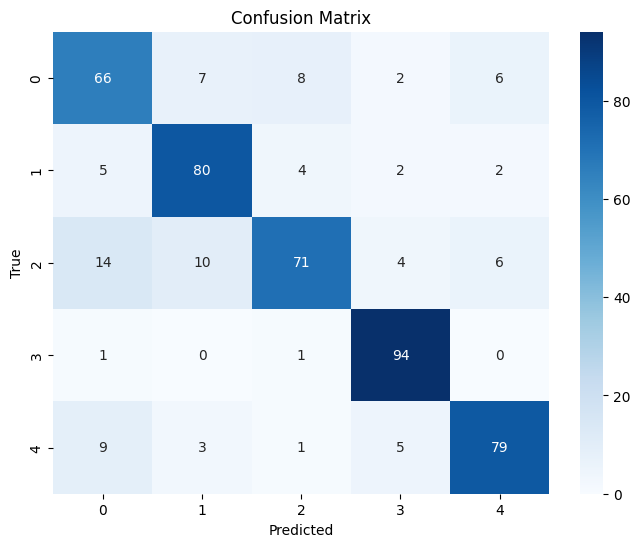

In [45]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'test' is your test dataset
# Convert test dataset into numpy arrays for predictions
y_true = []  # True labels
y_pred = []  # Predicted labels

# Loop through the test dataset to get true labels and predictions
for batch in test.as_numpy_iterator():
    X, y = batch
    y_true.extend(y)  # Add true labels
    yhat = model.predict(X)  # Predict using the trained model
    y_pred.extend(np.argmax(yhat, axis=1))  # Get class predictions (highest probability)

# Convert the lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Accuracy: {accuracy:.4f}")

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))  # assuming 5 classes
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
